In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

In [2]:
df = pd.read_csv("stats.csv", index_col="date", parse_dates=['date'], infer_datetime_format=True)
cases_df = df.loc[:, ["cases", "deaths"]]
tests_df = df.loc[:, ["test_positive", "test_total"]]

# Evolution Charts

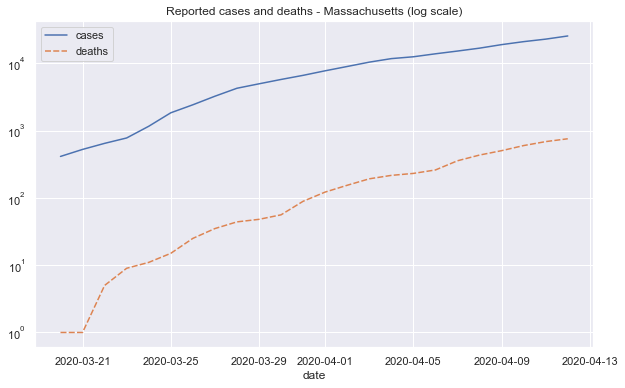

In [3]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=cases_df)
ax.set_yscale("log")

plt.title("Reported cases and deaths - Massachusetts (log scale)")

plt.show()

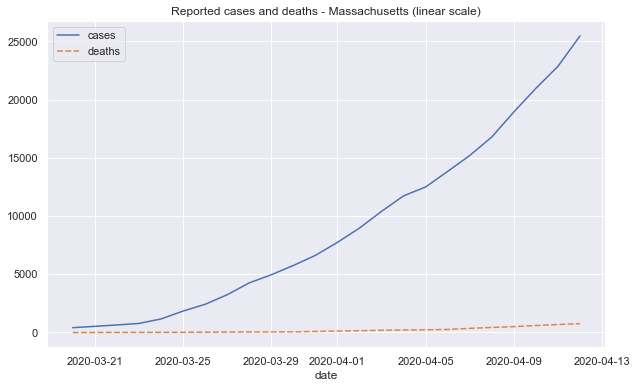

In [4]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=cases_df)
ax.set_yscale("linear")

plt.title("Reported cases and deaths - Massachusetts (linear scale)")

plt.show()

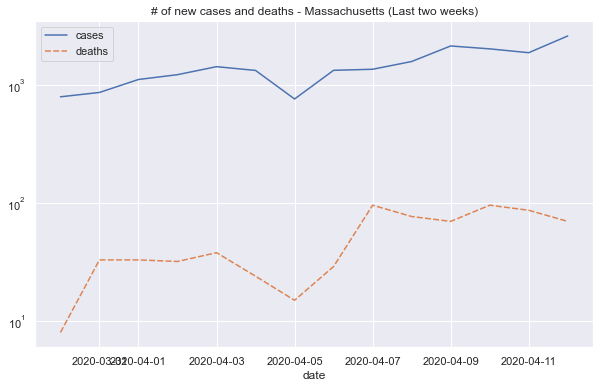

In [5]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=cases_df.diff().iloc[-14:])
ax.set_yscale("log")

plt.title("# of new cases and deaths - Massachusetts (Last two weeks)")

plt.show()

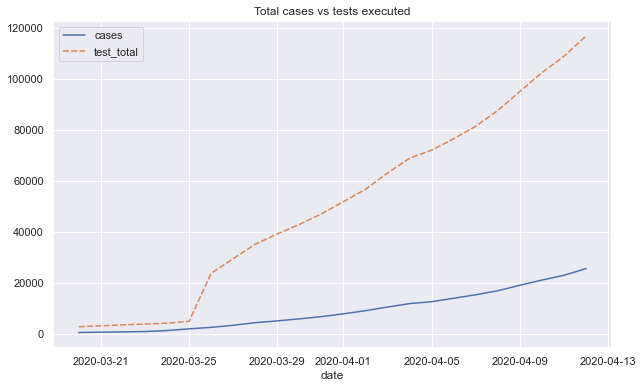

In [6]:
test_cases_df = df.loc[:, ["cases", "test_total"]]

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=test_cases_df)
ax.set_yscale("linear")

plt.title("Total cases vs tests executed")

plt.show()

   # Data for the past 3 days

In [7]:
df[-7:]

,cases,deaths,test_positive,test_total
date,,,,
2020-04-06,13837,260,1133,76429
2020-04-07,15202,356,1231,81344
2020-04-08,16790,433,1291,87511
2020-04-09,18941,503,1397,94958
2020-04-10,20974,599,1444,102372
2020-04-11,22860,686,1447,108776
2020-04-12,25475,756,1589,116730


In [8]:
df.pct_change().iloc[-7:]

,cases,deaths,test_positive,test_total
date,,,,
2020-04-06,0.106960,0.125541,0.109696,0.062444
2020-04-07,0.098649,0.369231,0.086496,0.064308
2020-04-08,0.104460,0.216292,0.048741,0.075814
2020-04-09,0.128112,0.161663,0.082107,0.085098
2020-04-10,0.107333,0.190855,0.033644,0.078077
2020-04-11,0.089921,0.145242,0.002078,0.062556
2020-04-12,0.114392,0.102041,0.098134,0.073123
